# Laboratory 05

## Exercise 1
• A publishing company has recently launched a new journal. In order to determine how effective it
is in reaching its possible audience, a market survey company selects a random sample of people
from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read
the last issue of the journal.

### a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal?

In [38]:
## Binomial distribution with a success probability p.
likelihood <- function(k,size,p){dbinom(k,size,p)}

### b) Assuming a uniform prior, what is the posterior distribution for y?

In [39]:
prior <- dunif
posterior <- function(x){likelihood(29,150,x)*prior(x)}

### c) Plot both posterior and likelihood ditributions functions

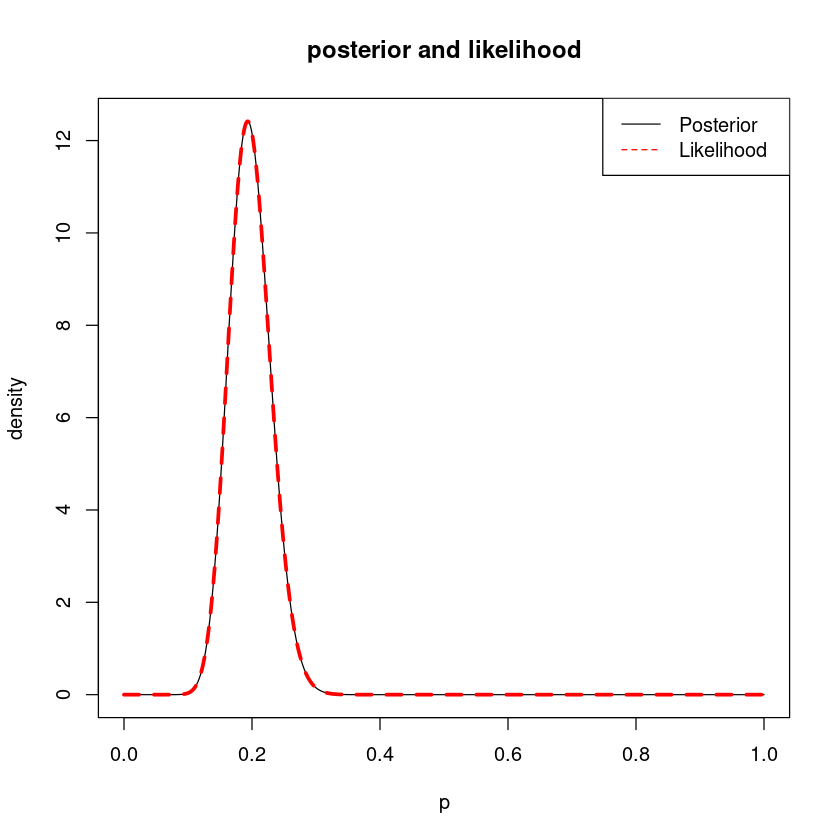

In [46]:
x <- seq(0,1,0.001)

# Both functions normalized for comparison purposes
c <- integrate(posterior,0,1)$value
plot(x, posterior(x)/c, main = 'posterior and likelihood', ylab = 'density', xlab = 'p', lty = 1, type = 'l', col = 1)

c_l <- integrate(function(x){likelihood(29,150,x)},0,1)$value
lines(x,likelihood(29,150,x)/c_l, lty = 2, lwd = 3, col = 2)

legend("topright",legend = c("Posterior","Likelihood"), lty =1:2, col = 1:2)

## Exercise 2
Three students want to construct their prior probability about the proportion of residents that support the building of a new concert hall in their small town.

- Anna thinks that her prior is a beta distribution with mean 0.2 and a standard deviation of 0.08.

- Benny moved only recently to this new town and therefore he does non have the slightest idea about it. Therefore he decides to use a uniform prior.

- Chris believes that his prior should have a trapezoidal shape:

$$
\begin{align}
f(X)=\left\{
    \begin{array}\\
    20x,\ &0\le x\lt 0.1\\
    2,\ &0.1\le x\lt 0.3\\
    5-10x,\ &0.3\le x\lt 0.5\\
    0,\ &x\ge 0.5
    \end{array}\right.
\end{align}
$$


### a) Draw and compare the three prior distributions.

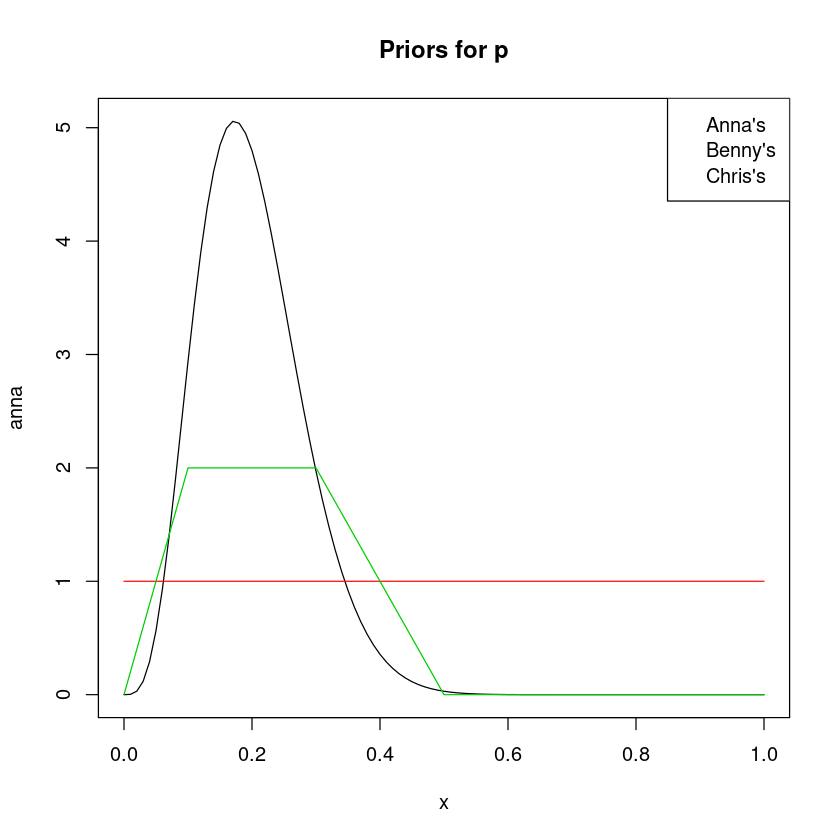

In [50]:
# After some algebra, we get that a beta distributions parameters are given as:
mu =0.2
sig = 0.08
alph <- (mu**2-mu**3-mu*sig**2)/sig**2
bet <- sig**2*(alph**2+alph)/(mu**2-sig**2*alph)

anna <- function(x){dbeta(x,alph,bet)}

benny <- function(x){dunif(x)}

chris <- function(x){
    if(x >= 0.5 | x < 0){
        return(0)
    }
    if(x>=0.3){
        return(5-10*x)
    }
    if(x >= 0.1){
        return(2)
    }
    return(20*x)
}
x <- seq(0,1,0.01)
chris<- Vectorize(chris)

plot(anna, lty = 1, main = "Priors for p", col = 1)
lines(x,benny(x), col = 2)
lines(x, chris(x), col = 3)
legend("topright",legend = c("Anna's","Benny's", "Chris's"), col = 1:3)

The next day the three students decide to interview a sample of 100 citizens of the small town, asking for their opinion. Out of the interviewed sample, 26 support the building of the new concert hall.

### b) Evaluate and draw the three posterior distributions.

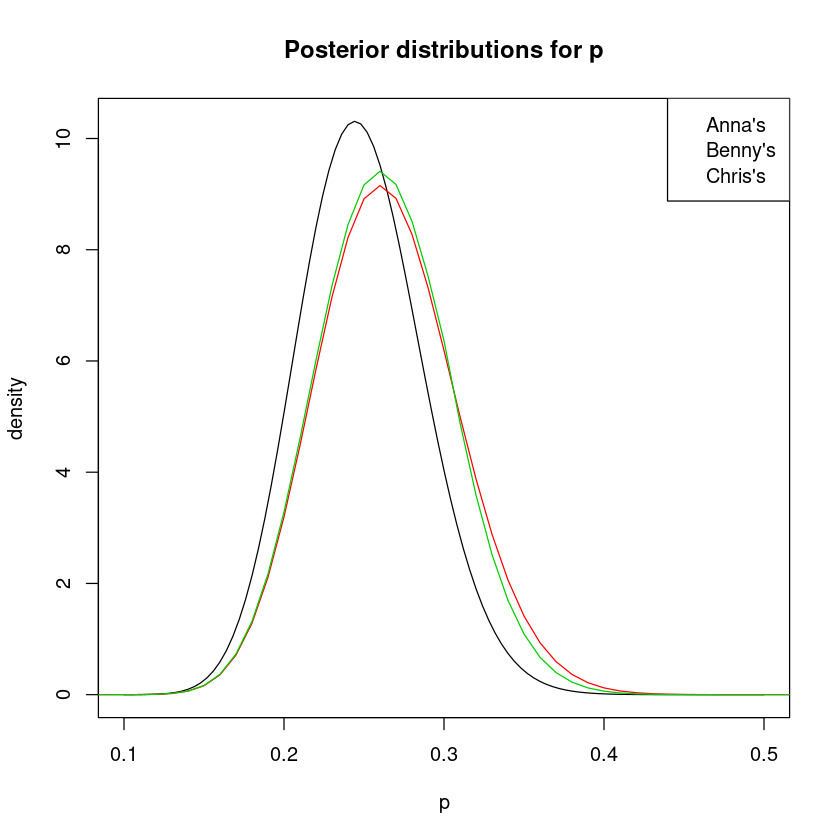

In [53]:
# we set a binomial distribution for the likelihood
likelihood <- function(p){dbinom(26,100,p)}

post_dist <- function(likelihood,prior_dist){
    pre_post <- function(x){likelihood(x)*prior_dist(x)}
    c_post <- 1/integrate(pre_post,0,1)$value
    return(function(x){c_post*pre_post(x)})
}


post_anna <- post_dist(likelihood,anna)
post_benny <- post_dist(likelihood,benny)
post_chris <- post_dist(likelihood,chris)

plot(post_anna, main = 'Posterior distributions for p', ylab ='density', xlab = 'p', col = 1, xlim = c(0.1,0.5))
lines(x,post_benny(x), col = 2)
lines(x,post_chris(x), col = 3)
legend("topright",legend = c("Anna's","Benny's", "Chris's"), col =1:3)

### c)  Give an estimate of the most probable value and the 95% credibility interval

In [79]:
find_ci <- function(post,c.i.,low,high){
    x <- seq(low,high,0.01)
    best_x <- x[which.max(post(x))]
    low_c <- (low+best_x)/2
    high_c <- (high+best_x)/2
    c <- integrate(post,low_c,high_c)$value
    while(abs(c-c.i.) > 0.001){
        # The reference value is the best_x if the confidence is higher,
        # Otherwise, it is the lower or upper bound.
        # Therefore, the interval extremes may go closer to best_x
        # if the confidence is higher than desired
        # and further from it otherwise
        ref_low <- low*(c<c.i.)+best_x*(c>c.i.)
        ref_high <- ifelse(ref_low ==low,high,best_x)
        
        # we randomly choose whether to modify both or a single one of the bounds
        modify <- sample(4,1)
        # If modify is 1, 2 or 3, low_c is updated
        low_c <- (modify < 4)*(ref_low + low_c)/2+(modify == 4)*low_c
        # If modify is 2,3 or 4, high_c is updated
        high_c <- (modify > 1)*(ref_high + high_c)/2+(modify == 1)*high_c
        c <- integrate(post,low_c,high_c)$value
    }
    return(c(low_c,high_c,best_x))
}


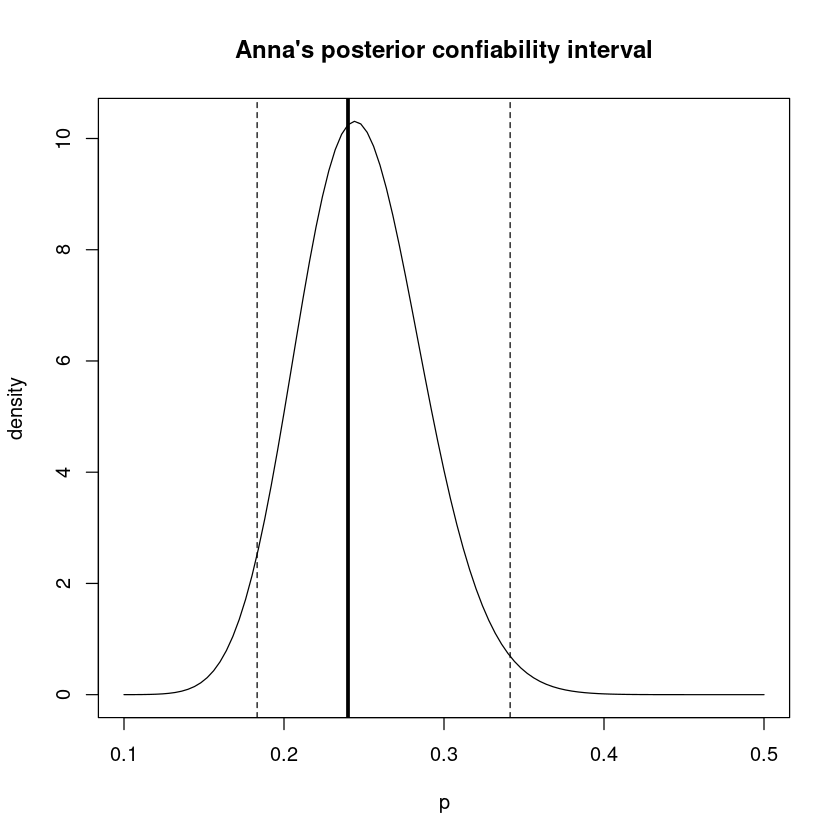

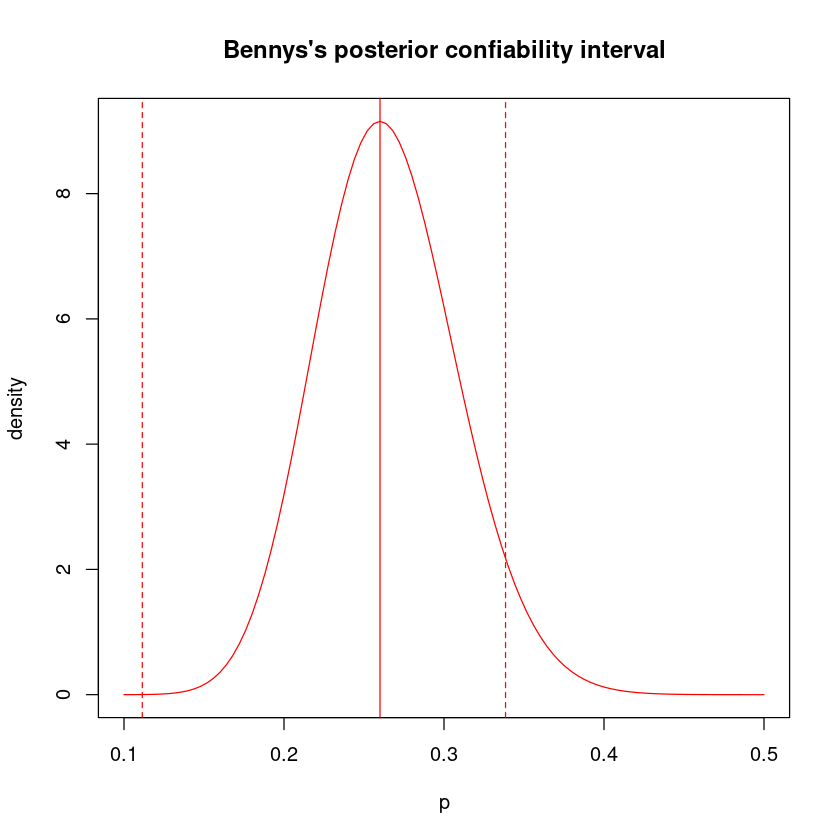

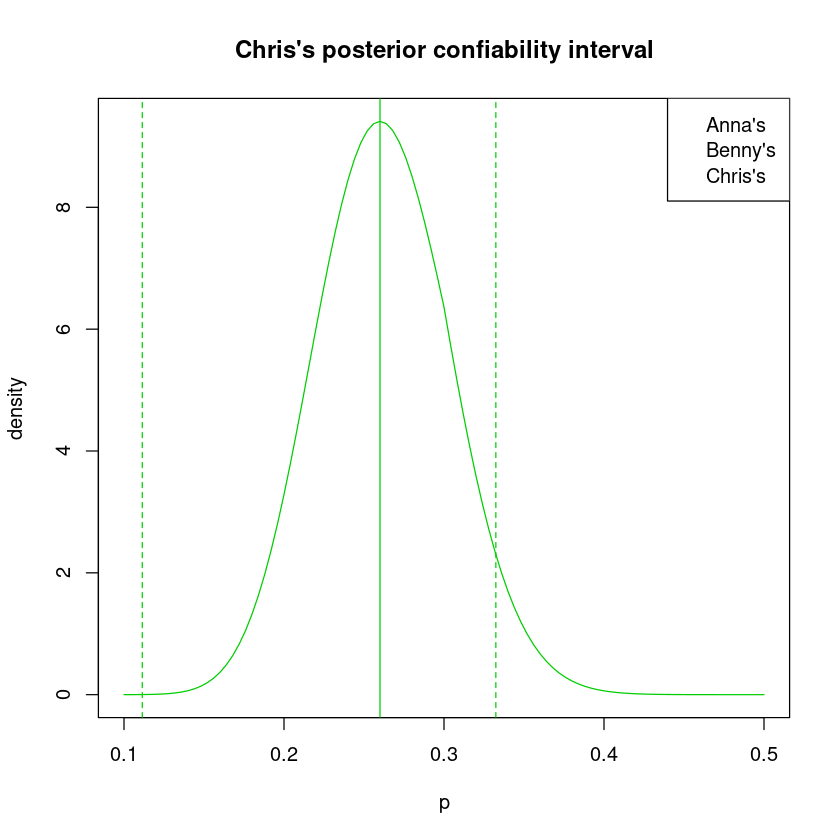

In [80]:
anna_int <- find_ci(post_anna, 0.95,0,1)
benny_int <- find_ci(post_benny, 0.95,0,1)
chris_int <- find_ci(post_chris, 0.95,0,1)

plot(post_anna, main = "Anna's posterior credibility interval", ylab ='density', xlab = 'p', col = 1, xlim = c(0.1,0.5))
abline(v =anna_int, lty = c(2,2,1),col = 1, lwd = c(1,1,3))

plot(post_benny, main = "Bennys's posterior credibility interval", ylab ='density', xlab = 'p', col = 2, xlim = c(0.1,0.5))
abline(v =benny_int, lty = c(2,2,1),col = 2)

plot(post_chris, main = "Chris's posterior credibility interval", ylab ='density', xlab = 'p', col = 3, xlim = c(0.1,0.5))
abline(v =chris_int, lty = c(2,2,1),col = 3)

legend("topright",legend = c("Anna's","Benny's", "Chris's"), col =1:3)

## Exercise 3
A coin is flipped n = 30 times with the following outcomes:
$$
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H
$$

In [81]:
T <- 1
H <- 0
flips <- c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H)

### a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

In [89]:
flat_prior <- dunif
beta_prior <- function(x){dbeta(x,5,5)}
## Once again, we use a binomial likelihood
likelihood <- function(k,size,p){dbinom(k,size,p)}

post_dist <- function(likelihood,prior_dist){
    pre_post <- function(x){likelihood(x)*prior_dist(x)}
    c_post <- 1/integrate(pre_post,0,1)$value
    return(function(x){c_post*pre_post(x)})
}

flat_post <- post_dist(function(x){likelihood(sum(flips),length(flips),x)},flat_prior)
beta_post <- post_dist(function(x){likelihood(sum(flips),length(flips),x)},beta_prior)


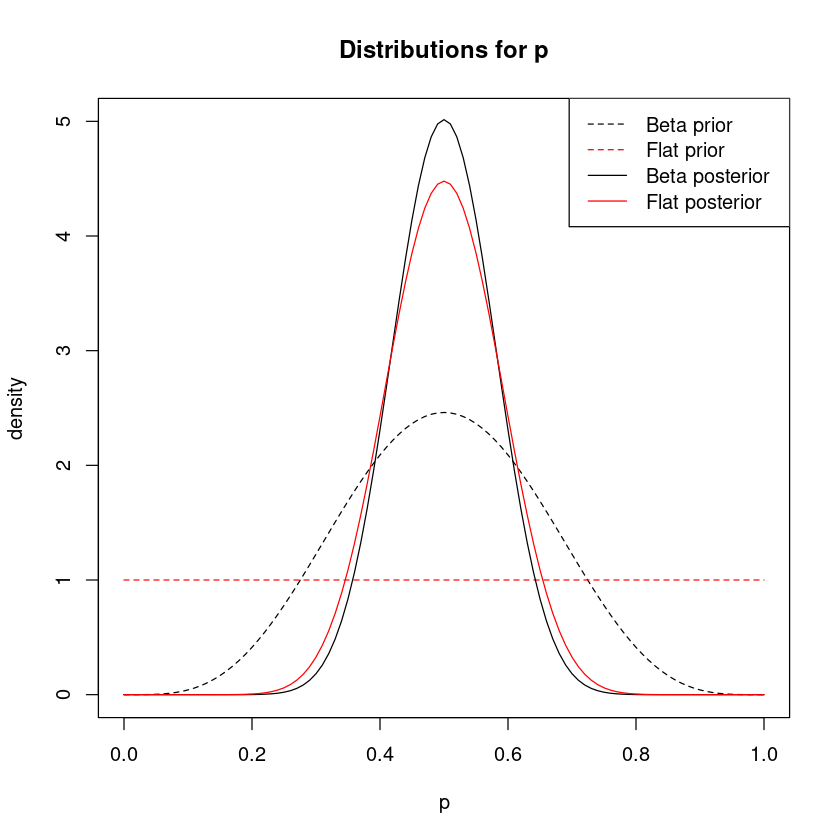

In [92]:
x <- seq(0,1,0.01)

plot(beta_prior, main = 'Distributions for p', lty = 2, ylab ='density', xlab = 'p', col = 1, ylim = c(0,5))
lines(x,flat_prior(x), lty = 2, col = 2)
lines(x,beta_post(x), lty = 1, col = 1)
lines(x,flat_post(x), lty = 1, col = 2)

legend("topright",legend = c("Beta prior","Flat prior", "Beta posterior", "Flat posterior"), lty =c(2,2,1,1), col = c(1,2,1,2))



### b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

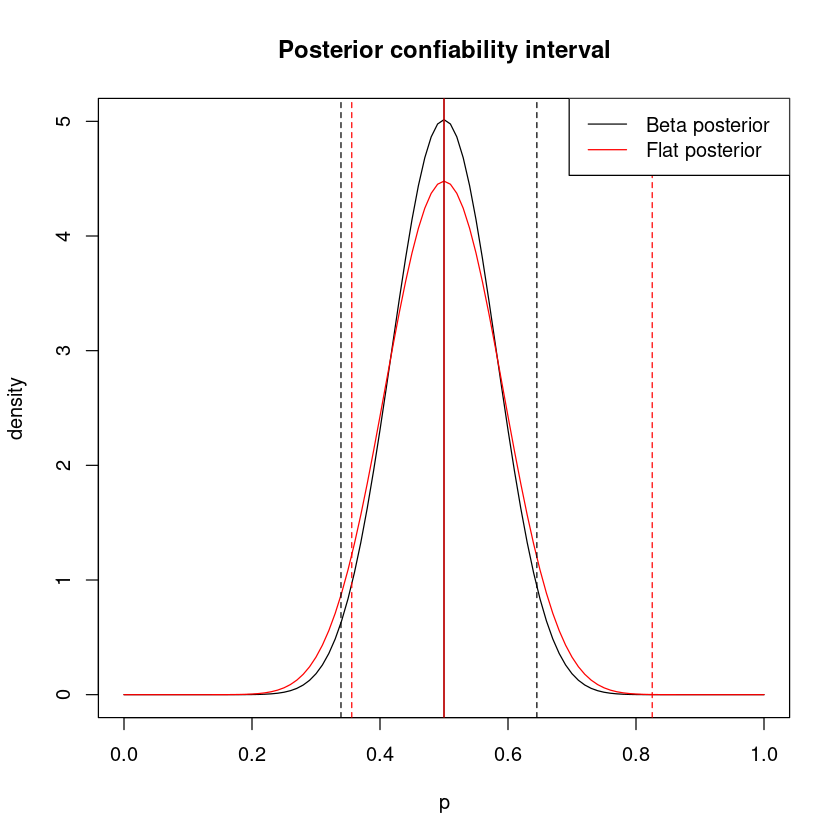

In [98]:
beta_int <- find_ci(beta_post,0.95,0,1)
flat_int <-find_ci(flat_post,0.95,0,1)

plot(beta_post, main = 'Posterior credibility interval', lty = 1, ylab ='density', xlab = 'p', col = 1, ylim = c(0,5))
lines(x,flat_post(x), lty = 1, col =2)
abline(v = beta_int, lty = c(2,2,1), col = 1)
abline(v = flat_int, lty = c(2,2,1), col = 2)

legend("topright",legend = c("Beta posterior", "Flat posterior"), lty =1, col = c(1,2))


### c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

In [99]:
prior <- beta_prior
ints <- array(0,c(length(flips),3))

for(i in 1:length(flips)){
    flip <- flips[i]
    prior <- post_dist(function(x){likelihood(flip,1,x)},prior)
    ints[i,] <- find_ci(prior,0.95,0,1)
}

0.29166631,0.8537698,0.56
0.34982905,0.9481776,0.60
0.37582400,0.8800000,0.64
0.42681795,0.9450269,0.67
0.45910237,0.9489766,0.69
0.08458296,0.5193931,0.29
0.51492174,0.9550000,0.73
0.53100586,0.9271240,0.75
0.00000000,0.0000000,0.00
0.00000000,0.0000000,0.00
0.00000000,0.0000000,0.00


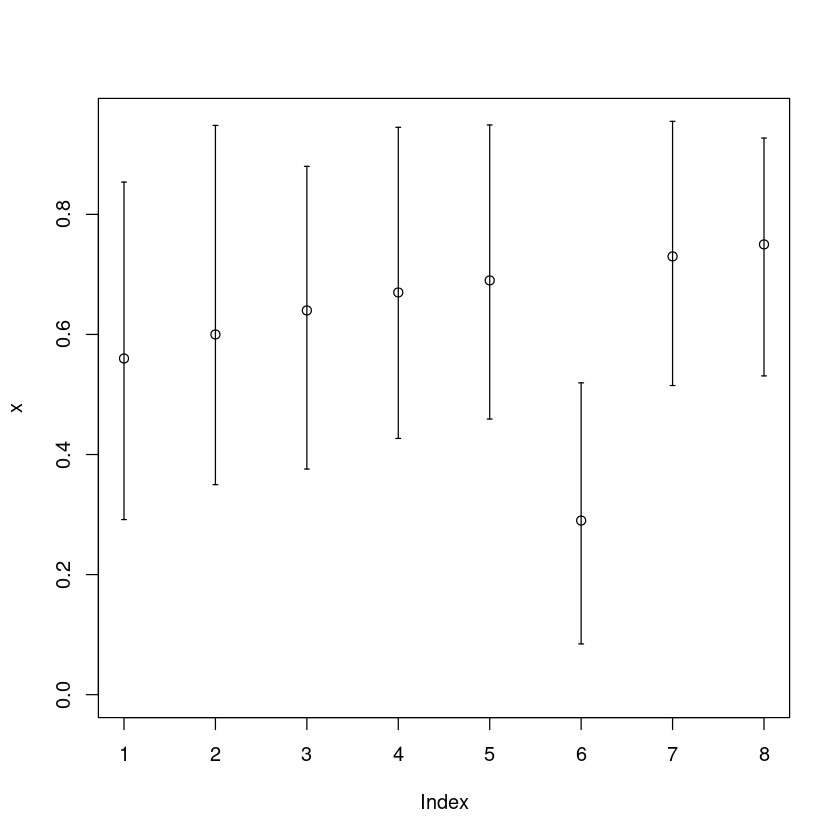

In [119]:
low_c <- ints[1:8,1]
high_c <- ints[1:8,2]
x <- ints[1:8,3]
plot(x, ylim = c(0,max(high_c)))
arrows(1:8, low_c, 1:8, high_c, length=0.02, angle=90, code=3)

In [109]:
x

[1] 0.56 0.60 0.64 0.67 0.69 0.29

### d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

function (x) 
UseMethod("rev")
<bytecode: 0x56369e1b0968>
<environment: namespace:base>